<a href="https://colab.research.google.com/github/WayneMao/ML/blob/master/2KNN/2KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### KNN
**KNN**: K近邻算法。

KNN算法分类问题：
- 欧氏距离
- 投票模块

K取单数防平局

总结：
1. 一个极其简单算法，适用于低维空间
2. KNN在训练过程中是指上不需要做任何事情，所以训练本身不产生任何时间上的消耗
3. 


### 2.2 K近邻的决策边界及K的影响

(100, 2)
(200, 2) (200,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
(83, 88)


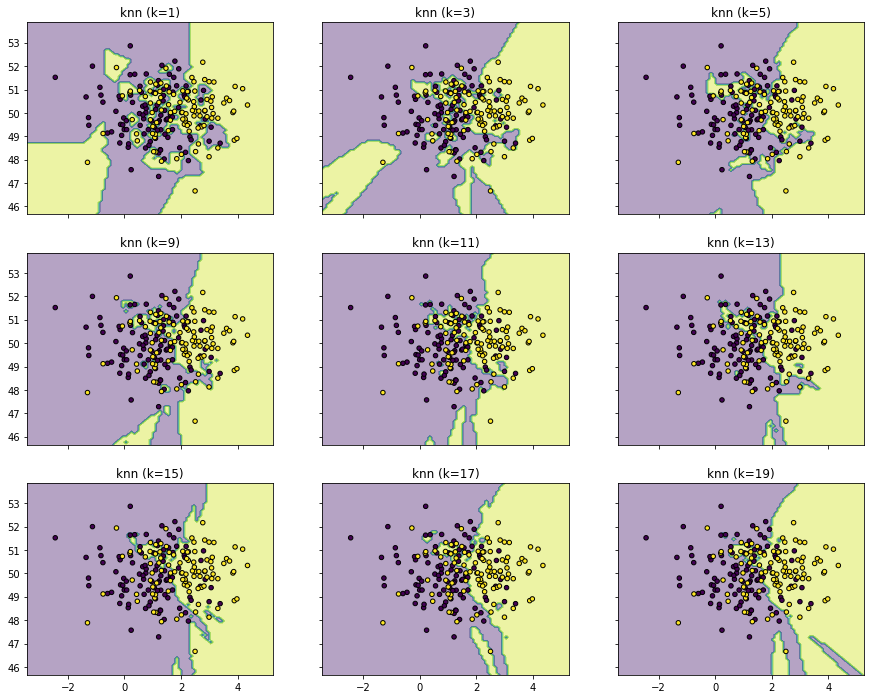

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import product  # itertools 为高效循环而创建迭代器的函数
from sklearn.neighbors import KNeighborsClassifier

# 生成一些随机样本
n_points = 100 # size
X1 = np.random.multivariate_normal([1,50],[[1,0],[0,1]],n_points)# 从多元正态分布中随机抽取样本。
X2 = np.random.multivariate_normal([2,50],[[1,0],[0,1]],n_points)# 依据指定的均值和协方差生成数据 (100,2)


X = np.concatenate([X1,X2]) # 拼接数组, 默认axis=0 (200,2)
y = np.array([0]*n_points + [1]*n_points) # (200,) [0 0 0 .....1 1 1 ]
print(X1.shape)
print(X.shape,y.shape)


# KNN模型的训练过程
clfs = []
neighbors = [1,3,5,9,11,13,15,17,19]
for i in range(len(neighbors)):
    clfs.append(KNeighborsClassifier(n_neighbors = neighbors[i]).fit(X,y))
    
# 可视化结果
x_min, x_max = X[:,0].min() - 1,X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1,X[:,1].max() + 1
xx,yy = np.meshgrid(np.arange(x_min,x_max,0.1),\
                    np.arange(y_min,y_max,0.1)) # (76,76)
# 画网格
print(xx.shape)
f,axarr = plt.subplots(3,3,sharex='col',sharey='row',figsize=(15,12)) # f-figure; ax子图

for idx,clf,tt in zip(product([0,1,2],[0,1,2]),clfs,\
                        ['knn (k=%d)'%k for k in neighbors]):
    Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])  # np.ravel np.flatten 降维； flatten：返回的是拷贝
    # np.c_ 将slice对象沿第二轴进行连接。
    # np.c_是按行连接两个矩阵，就是把两矩阵左右相加，要求行数相等，类似于pandas中的merge()
    #print(Z.shape) #(6004,)  79*76
    #print(xx.shape)
    Z = Z.reshape(xx.shape)
    #print(Z.shape) #(79, 76)
    
    axarr[idx[0],idx[1]].contourf(xx,yy,Z,alpha=0.4)
    # contourf 等高线图 Z-高度值； alpha-透明度
    axarr[idx[0],idx[1]].scatter(X[:,0],X[:,1],c=y,s=20,edgecolor='k')
    axarr[idx[0],idx[1]].set_title(tt)
    
plt.show()    

In [17]:
n_points = 5 # size
mean = [1,50]
cov = np.eye(2)
print(cov)
X1 = np.random.multivariate_normal(mean,cov)
print(X1)
print(X1.shape)
print("---------------")
X2 = np.random.multivariate_normal(mean,cov,5)# 从多元正态分布中随机抽取样本。
print(X2)
print(X2.shape)
print("---------------")
X3 = np.random.multivariate_normal(mean,cov,(2,3))# 从多元正态分布中随机抽取样本。
print(X3)
print(X3.shape)

[[1. 0.]
 [0. 1.]]
[ 1.59783293 49.5454322 ]
(2,)
---------------
[[ 1.10459949 50.35614455]
 [ 1.27231472 50.24518849]
 [ 2.32256602 49.14711371]
 [ 2.2795399  49.14665348]
 [ 0.6434312  51.4772991 ]]
(5, 2)
---------------
[[[ 0.4552025  49.56210538]
  [ 0.0982163  50.26777622]
  [ 1.29606237 49.64481605]]

 [[ 1.44368298 50.81211377]
  [ 0.63128278 49.85930562]
  [ 1.89563095 50.21420864]]]
(2, 3, 2)


In [26]:
# 笛卡尔积，相当于嵌套的for循环;
# 将所有元组组合成一个列表返回
for item in product([0,1,2],[0,1,2]):
    print(item)


(0, 0)
(0, 1)
(0, 2)
(1, 0)
(1, 1)
(1, 2)
(2, 0)
(2, 1)
(2, 2)


In [0]:
from sklearn import datasets
from collections import Counter  # 为了做投票
from sklearn.model_selection import train_test_split
import numpy as np

# 导入iris数据
iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2003)


def euc_dis(instance1, instance2):
	"""
	计算两个样本instance1和instance2之间的欧式距离
	instance1: 第一个样本， array型
	instance2: 第二个样本， array型
	"""
	# TODO
	dist = np.sqrt( np.sum((instance1 - instance2)**2))
	return dist
    
    
def knn_classify(X, y, testInstance, k):
    distances = [euc_dis(x,testInstance) for x in X]
    kneighbors = np.argsort(distances)[:k]
    count = Counter(y[kneighbors])
    return count.most_common()[0][0]
"""
	给定一个测试数据testInstance, 通过KNN算法来预测它的标签。 
	X: 训练数据的特征
	y: 训练数据的标签
	testInstance: 测试数据，这里假定一个测试数据 array型
	k: 选择多少个neighbors? 
	"""
	# TODO  返回testInstance的预测标签 = {0,1,2} 

    
    
# 预测结果。    
predictions = [knn_classify(X_train, y_train, data, 3) for data in X_test]
correct = np.count_nonzero((predictions==y_test)==True)
print ("Accuracy is: %.3f" %(correct/len(X_test)))

Accuracy is: 0.921


### 交叉验证

交叉验证是机器学习建模中非常非常重要的一步，也是大多数人所说的“调参”的过程。  
**核心思想：**把一些可能的K逐个去尝试一遍，然后选出效果最好的K值。  
**K折交叉验证(K-fold Cross Validation):** 1.我们先把训练数据再分成训练集和验证集，2.之后使用训练集来训练模型，3.然后再验证集上评估模型的准确率。  
4.针对不同的K值，逐一尝试从而选择最好的。并且，这种参数我们称作**超参数(Hyperparameter).**  
**留一法交叉验证**


In [1]:
# KNN交叉验证

import numpy as np
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold # 主要用于K折交叉验证

#以下导入iris数据集
iris = datasets.load_iris()
X = iris.data
y = iris.target
print(X.shape,y.shape) # (150, 4) (150,)

# 定义我们想要搜索的K值(候选集)，这里定义8个不同的值
ks = [1,3,5,7,9,11]

# 进行5折交叉验证， KFold返回的是每一折中训练数据和验证数据的index
# 假设数据样本为：[1,3,5,6,11,12,43,12,44,2],总共十个样本
# 则返回的kf的格式为（前面的是训练数据，后面的是验证集
# [0,1,3,5,6,7,8,9],[2,4]
# ......
kf = KFold(n_splits=5, random_state= 2001, shuffle=True) # shuffle：在每次划分时，是否进行洗牌

# 保存当前最好的K值和对应的准确率值
best_k = ks[0]
best_score = 0

# 循环每一个K值
for k in ks:
  curr_score = 0
  for train_index, valid_index in kf.split(X):
    # 每一折的训练及计算准确率
    clf = KNeighborsClassifier(n_neighbors=k)# init
    clf.fit(X[train_index],y[train_index])
    curr_score = curr_score + clf.score(X[valid_index],y[valid_index]) #正确率打分

    #求一下5折的平均准确率
    avg_score = curr_score/5
    if avg_score > best_score:
      best_k = k
      best_score = avg_score
    print("Current best score is %0.2f"%best_score, "best k: %d"%best_k)

print("After cross validation, the final best k is: %d"%best_k)




(150, 4) (150,)
Current best score is 0.19 best k: 1
Current best score is 0.38 best k: 1
Current best score is 0.57 best k: 1
Current best score is 0.77 best k: 1
Current best score is 0.96 best k: 1
Current best score is 0.96 best k: 1
Current best score is 0.96 best k: 1
Current best score is 0.96 best k: 1
Current best score is 0.96 best k: 1
Current best score is 0.96 best k: 1
Current best score is 0.96 best k: 1
Current best score is 0.96 best k: 1
Current best score is 0.96 best k: 1
Current best score is 0.96 best k: 1
Current best score is 0.97 best k: 5
Current best score is 0.97 best k: 5
Current best score is 0.97 best k: 5
Current best score is 0.97 best k: 5
Current best score is 0.97 best k: 5
Current best score is 0.98 best k: 7
Current best score is 0.98 best k: 7
Current best score is 0.98 best k: 7
Current best score is 0.98 best k: 7
Current best score is 0.98 best k: 7
Current best score is 0.98 best k: 7
Current best score is 0.98 best k: 7
Current best score is 

In [0]:
# KNN交叉验证
from sklearn.model_selection import GridSearchCV # 通过网格方式来搜索参数
# 自动调参， 适用于小数据集

from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier


#以下导入iris数据集
iris = datasets.load_iris()
X = iris.data
y = iris.target

# 设置需要搜索的K值， n_neighbors 是sklearn中KNN的参数
parameters = {'n_neighbors':[1,3,5,7,9,11,13,15]}
knn = KNeighborsClassifier()

# 通过GridSearchCV来搜索最好的K值， 这个模块内部==对每个K值做了评估

clf = GridSearchCV(knn,parameters,cv=5)
clf.fit(X,y)

# 输出最好的参数以及对应的准确率
print("Best score is:%.2f"%clf.best_score_, "Best param:",clf.best_params_)

Best score is:0.98 Best param: {'n_neighbors': 7}


### 特征缩放
#### 1. 线性归一化(Min-max Normalization)

$$ X_{new} = \frac {X - min(X)} {max(X) - min(X)}  $$

####2. 标准差归一化(Z-score Normalization)
$$ X_{new} = \frac {X - mean(X)} {std(X)} $$
 
 $std(X)$ 标准差
 特征映射到 N~(0,1） 正态分布区间